In [2]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('/content/Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
df=df.drop(columns=['Unnamed: 0'])

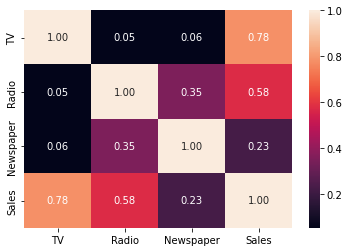

In [8]:
df.corr()
sns.heatmap(df.corr(), annot=True, fmt=".2f")

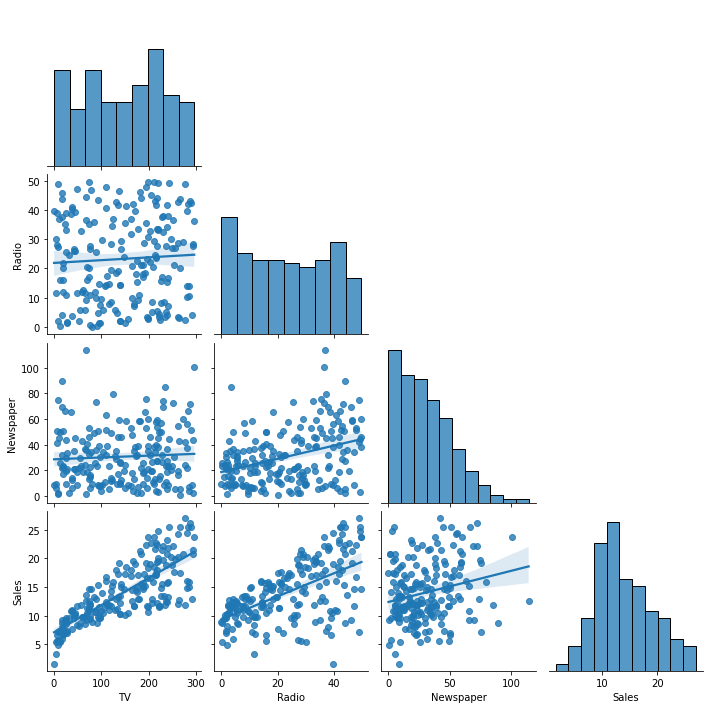

In [9]:
sns.pairplot(df, kind="reg",corner=True, );

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


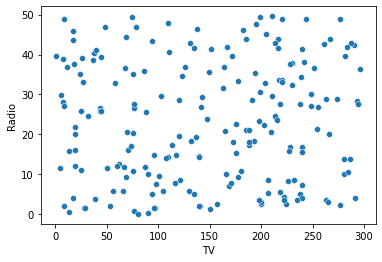

In [10]:
sns.scatterplot(df['TV'],df['Radio'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


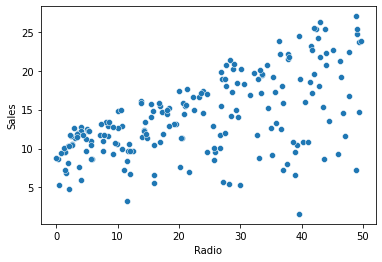

In [11]:
sns.scatterplot(df['Radio'],df['Sales'])

In [12]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [13]:
x=df.drop(['Sales'],axis=1)
y=df['Sales']

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [19]:
#Random Forest 
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
clf = RandomForestRegressor()
clf.fit(x_train, y_train)

RandomForestRegressor()

In [20]:
predicted=clf.predict(x_test)

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test,predicted)

0.9793967343584123

In [15]:
#Linear Regression
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf=clf.fit(x_train,y_train)

In [16]:
predicted=clf.predict(x_test)

In [22]:
r2_score(y_test,predicted)

0.9793967343584123

In [24]:
#Support Vector Regression
from sklearn.svm import SVR
clf = SVR()
clf.fit(x_train, y_train)

SVR()

In [25]:
predicted=clf.predict(x_test)

In [26]:
r2_score(y_test,predicted)

0.8388187580436592